In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
train = pd.read_csv('train.csv')
train.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [62]:
train.shape

(478741, 27)

In [63]:
train.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [64]:
test = pd.read_csv('test.csv')
test.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,14,13,2,0,06/10/13,6,13:28,218,E10000032,4,...,Daylight: Street light present,Snowing without high winds,Dry,None,None,2,Yes,England,HX2 8WH,United Kingdom
1,17,13,2,0,22/04/13,7,9:30,157,E10000034,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,RM8 1DD,United Kingdom
2,21,13,2,0,27/09/13,3,19:10,155,E09000012,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,England,SE23 1NH,United Kingdom
3,23,13,2,0,13/03/13,4,9:19,26,E10000016,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,HU10 7QS,United Kingdom
4,28,14,2,0,13/06/13,1,14:59,6,E08000012,4,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BD23 5JL,United Kingdom


In [65]:
test.shape

(121259, 27)

In [66]:
test.isnull().sum()

Accident_ID                                     0
Police_Force                                    0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                            1
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
2nd_Road_Class                                  0
2nd_Road_Number                                 0
Pedestrian_Crossing-Human_Control               0
Pedestrian_Crossing-Physical_Facilities         0
Light_Conditions                                0
Weather_Conditions                              0
Road_Surface_Conditions                        39


In [67]:
a = train.groupby('postcode', sort = False).sum('Number_of_Casualties')['Number_of_Casualties']
a = a.reset_index()
a.head()

,postcode,Number_of_Casualties
0,OX3 9UP,11
1,S35 4EZ,4
2,BN21 2XR,16
3,TA20 3PT,20
4,DN20 0QF,9


In [68]:
a.shape

(95625, 2)

In [69]:
b = train.groupby('postcode', sort = False).agg('count')['Accident_ID']
b = b.reset_index()
b.head()

,postcode,Accident_ID
0,OX3 9UP,6
1,S35 4EZ,3
2,BN21 2XR,12
3,TA20 3PT,12
4,DN20 0QF,6


In [70]:
train[train['postcode'] == 'BN21 2XR']

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
15248,19111,4,1,1,28/05/12,5,14:04,86,E10000016,3,...,Daylight: Street light present,Fine without high winds,Wet/Damp,Roadworks,None,1,Yes,England,BN21 2XR,United Kingdom
86457,108224,45,2,1,11/02/12,4,8:50,486,E10000012,5,...,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,England,BN21 2XR,United Kingdom
89885,112465,95,2,1,30/03/12,4,7:20,933,E08000034,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,England,BN21 2XR,United Kingdom
172427,215915,15,2,2,17/09/12,5,8:59,210,E10000027,6,...,Daylight: Street light present,Raining with high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
241508,302496,43,2,1,14/04/12,1,15:15,542,E09000005,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BN21 2XR,United Kingdom
260774,326651,46,2,3,13/12/12,6,22:00,481,E10000023,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BN21 2XR,United Kingdom
271004,339462,5,2,1,16/11/12,6,11:00,1,E10000016,5,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,England,BN21 2XR,United Kingdom
313515,392766,21,2,1,26/09/12,3,1:35,483,E09000012,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,England,BN21 2XR,United Kingdom
389818,488573,52,2,2,26/05/12,3,13:30,638,E09000023,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,2,Yes,England,BN21 2XR,United Kingdom


In [71]:
b.shape

(95625, 2)

In [72]:
c = pd.merge(a, b, on = 'postcode', sort = False)
c.head()

,postcode,Number_of_Casualties,Accident_ID
0,OX3 9UP,11,6
1,S35 4EZ,4,3
2,BN21 2XR,16,12
3,TA20 3PT,20,12
4,DN20 0QF,9,6


In [73]:
c['Accident_Risk_Index'] = c['Number_of_Casualties']/c['Accident_ID']

In [74]:
c = c.drop(['Number_of_Casualties', 'Accident_ID'], axis = 1)
c.head()

,postcode,Accident_Risk_Index
0,OX3 9UP,1.833333
1,S35 4EZ,1.333333
2,BN21 2XR,1.333333
3,TA20 3PT,1.666667
4,DN20 0QF,1.500000


In [75]:
c.shape

(95625, 2)

In [76]:
newtrain = pd.merge(train, c, on = 'postcode')

In [77]:
newtrain.head(8)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,Accident_Risk_Index
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,1.833333
1,114321,1,1,1,26/04/12,4,13:30,728,S12000041,6,...,Fine without high winds,Wet/Damp,None,None,1,Yes,Cymru / Wales,OX3 9UP,United Kingdom,1.833333
2,151919,21,2,3,17/02/12,1,14:40,325,E06000029,4,...,Fine without high winds,Dry,None,None,2,Yes,England,OX3 9UP,United Kingdom,1.833333
3,226233,34,2,2,14/01/12,6,19:20,347,E08000032,3,...,Fine without high winds,Dry,None,None,2,Yes,England,OX3 9UP,United Kingdom,1.833333
4,263194,62,2,1,22/09/12,4,8:42,778,E10000017,6,...,Fine without high winds,Dry,None,None,1,Yes,Cymru / Wales,OX3 9UP,United Kingdom,1.833333
5,423353,93,4,3,26/05/12,3,8:53,922,W06000015,3,...,Fine without high winds,Dry,None,None,2,Yes,Alba / Scotland,OX3 9UP,United Kingdom,1.833333
6,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,1.333333
7,29141,11,2,1,29/02/12,6,11:38,142,E06000009,6,...,Fine without high winds,Dry,None,None,2,Yes,England,S35 4EZ,United Kingdom,1.333333


In [78]:
newtrain = newtrain.dropna()

In [79]:
newtrain.shape

(478212, 28)

In [80]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478212 entries, 0 to 478740
Data columns (total 28 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_ID                                  478212 non-null  int64  
 1   Police_Force                                 478212 non-null  int64  
 2   Number_of_Vehicles                           478212 non-null  int64  
 3   Number_of_Casualties                         478212 non-null  int64  
 4   Date                                         478212 non-null  object 
 5   Day_of_Week                                  478212 non-null  int64  
 6   Time                                         478212 non-null  object 
 7   Local_Authority_(District)                   478212 non-null  int64  
 8   Local_Authority_(Highway)                    478212 non-null  object 
 9   1st_Road_Class                               478212 non-nul

{'whiskers': [<matplotlib.lines.Line2D at 0x254017e8640>,
 'caps': [<matplotlib.lines.Line2D at 0x254017e8d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x254017e82e0>],
 'medians': [<matplotlib.lines.Line2D at 0x254017f0400>],
 'fliers': [<matplotlib.lines.Line2D at 0x254017f0760>],
 'means': []}

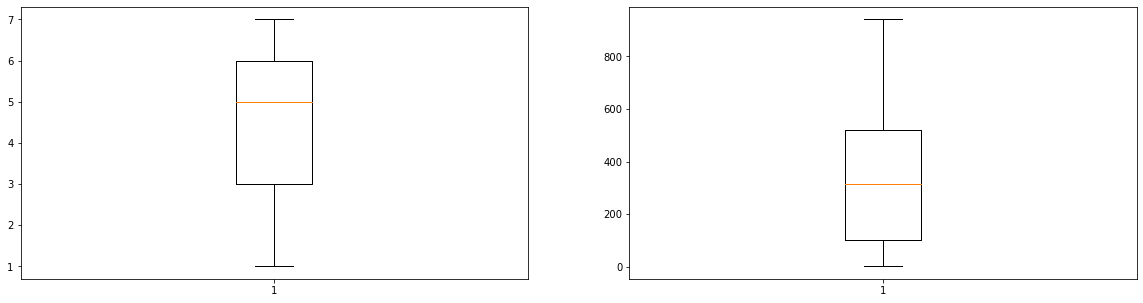

In [81]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['Day_of_Week'])
ax2.boxplot(newtrain['Local_Authority_(District)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25401d9b3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25401d9ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x25401d9b070>],
 'medians': [<matplotlib.lines.Line2D at 0x25401da5190>],
 'fliers': [<matplotlib.lines.Line2D at 0x25401da54f0>],
 'means': []}

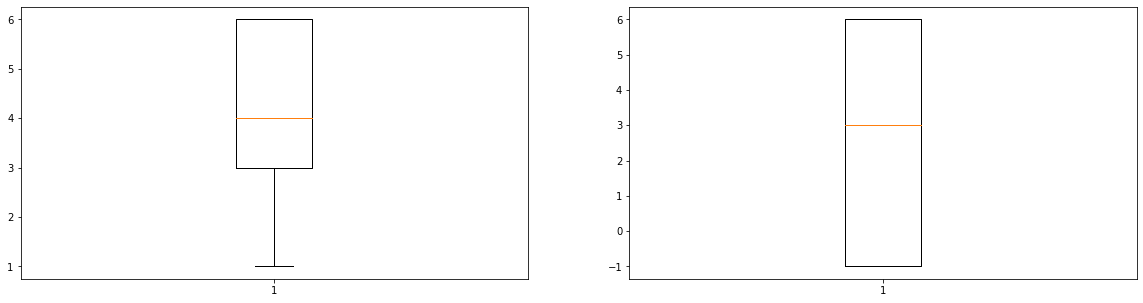

In [82]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['1st_Road_Class'])
ax2.boxplot(newtrain['2nd_Road_Class'])


{'whiskers': [<matplotlib.lines.Line2D at 0x254051f70a0>,
 'caps': [<matplotlib.lines.Line2D at 0x254051f7760>,
 'boxes': [<matplotlib.lines.Line2D at 0x25401e9bd00>],
 'medians': [<matplotlib.lines.Line2D at 0x254051f7e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x254052001c0>],
 'means': []}

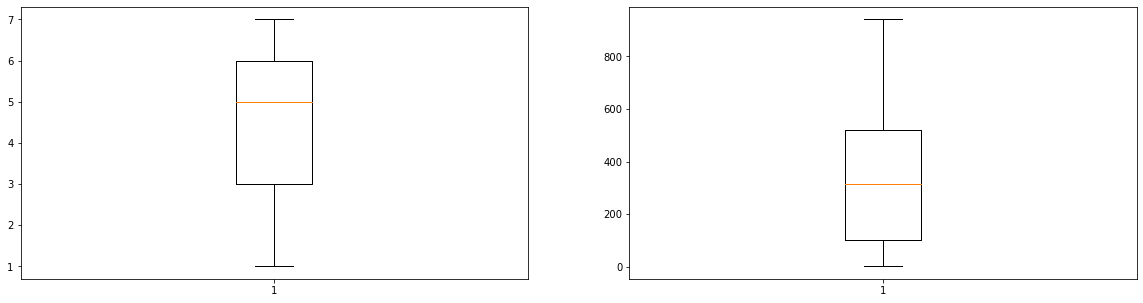

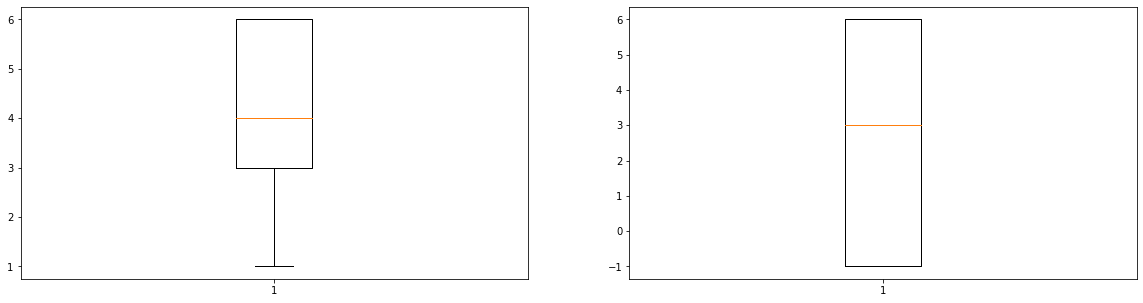

In [83]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['Day_of_Week'])
ax2.boxplot(newtrain['Local_Authority_(District)'])

fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['1st_Road_Class'])
ax2.boxplot(newtrain['2nd_Road_Class'])


In [84]:
newtest = test.copy()

In [85]:
newtest['Time'] = newtest['Time'].fillna(method = 'ffill')

In [86]:
newtest['Road_Surface_Conditions'] = newtest['Road_Surface_Conditions'].fillna(newtest['Road_Surface_Conditions'].value_counts().index[0])

In [87]:
newtest['Special_Conditions_at_Site'] = newtest['Special_Conditions_at_Site'].fillna(newtest['Special_Conditions_at_Site'].value_counts().index[0])

In [88]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121259 entries, 0 to 121258
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  121259 non-null  int64 
 1   Police_Force                                 121259 non-null  int64 
 2   Number_of_Vehicles                           121259 non-null  int64 
 3   Number_of_Casualties                         121259 non-null  int64 
 4   Date                                         121259 non-null  object
 5   Day_of_Week                                  121259 non-null  int64 
 6   Time                                         121259 non-null  object
 7   Local_Authority_(District)                   121259 non-null  int64 
 8   Local_Authority_(Highway)                    121259 non-null  object
 9   1st_Road_Class                               121259 non-null  int64 
 

In [89]:
newtrain['Month'] = newtrain['Date'].apply(lambda x:x.split('/')[1])
newtrain['Year'] = newtrain['Date'].apply(lambda x:x.split('/')[2])

In [90]:
newtest['Month'] = newtest['Date'].apply(lambda x:x.split('/')[1])
newtest['Year'] = newtest['Date'].apply(lambda x:x.split('/')[2])

In [91]:
def time_preprocess(time):
    hour = int(time.split(':')[0])
    
    if hour <= 6:
        return 0
    elif hour <= 17:
        return 1
    else:
        return 2

In [92]:
newtrain['Time_of_the_Day'] = newtrain['Time'].apply(time_preprocess)

In [93]:
newtest['Time_of_the_Day'] = newtest['Time'].apply(time_preprocess)

In [94]:
x = ['Month', 'Year', 'Time_of_the_Day']
for i in x:
    newtest[i] = newtest[i].astype(int)
    newtrain[i] = newtrain[i].astype(int)

In [95]:
newtrain = newtrain.drop(['country', 'Time', 'Date', 'Accident_ID', '2nd_Road_Number'], axis = 1)

In [96]:
newtest = newtest.drop(['country', 'Time', 'Date', 'Accident_ID', '2nd_Road_Number'], axis = 1)

In [97]:
newtest.columns

Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'state', 'postcode', 'Month', 'Year', 'Time_of_the_Day'],
      dtype='object')

In [98]:
categorical = newtest.select_dtypes(include= 'object')
categorical.columns

Index(['Local_Authority_(Highway)', 'Road_Type',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'state', 'postcode'],
      dtype='object')

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [100]:
x = ['Local_Authority_(Highway)', 'Road_Type', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
     'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident', 'state']
for i in x:
    newtest[i] = le.fit_transform(newtest[i])
    newtrain[i] = le.fit_transform(newtrain[i])

In [101]:
newtrain['postcode'] = le.fit_transform(newtrain['postcode'])

In [102]:
newtest['postcode'] = le.fit_transform(newtest['postcode'])

In [103]:
newtrain.shape

(478212, 26)

In [104]:
newtrain.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,Accident_Risk_Index,Month,Year,Time_of_the_Day
0,34,2,1,7,344,150,4,395,3,30,...,4,3,1,1,2,60623,1.833333,12,12,1
1,1,1,1,4,728,181,6,5,3,30,...,3,3,1,1,1,60623,1.833333,4,12,1
2,21,2,3,1,325,28,4,353,0,70,...,3,3,2,1,2,60623,1.833333,2,12,1
3,34,2,2,6,347,87,3,308,3,60,...,3,3,2,1,2,60623,1.833333,1,12,2
4,62,2,1,4,778,137,6,335,3,30,...,3,3,1,1,1,60623,1.833333,9,12,1


In [105]:
newtest.shape

(121259, 25)

In [106]:
newtest.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,Month,Year,Time_of_the_Day
0,13,2,0,6,218,149,4,6358,3,60,...,0,3,3,2,1,2,18707,10,13,1
1,13,2,0,7,157,150,6,29,3,30,...,0,3,3,1,0,2,35501,4,13,1
2,13,2,0,3,155,102,3,5376,2,40,...,4,3,3,1,1,2,38203,9,13,2
3,13,2,0,4,26,135,4,1252,3,30,...,0,3,3,1,1,2,18279,3,13,1
4,14,2,0,1,6,66,4,1202,3,30,...,0,3,3,1,1,2,2567,6,13,1


<AxesSubplot:>

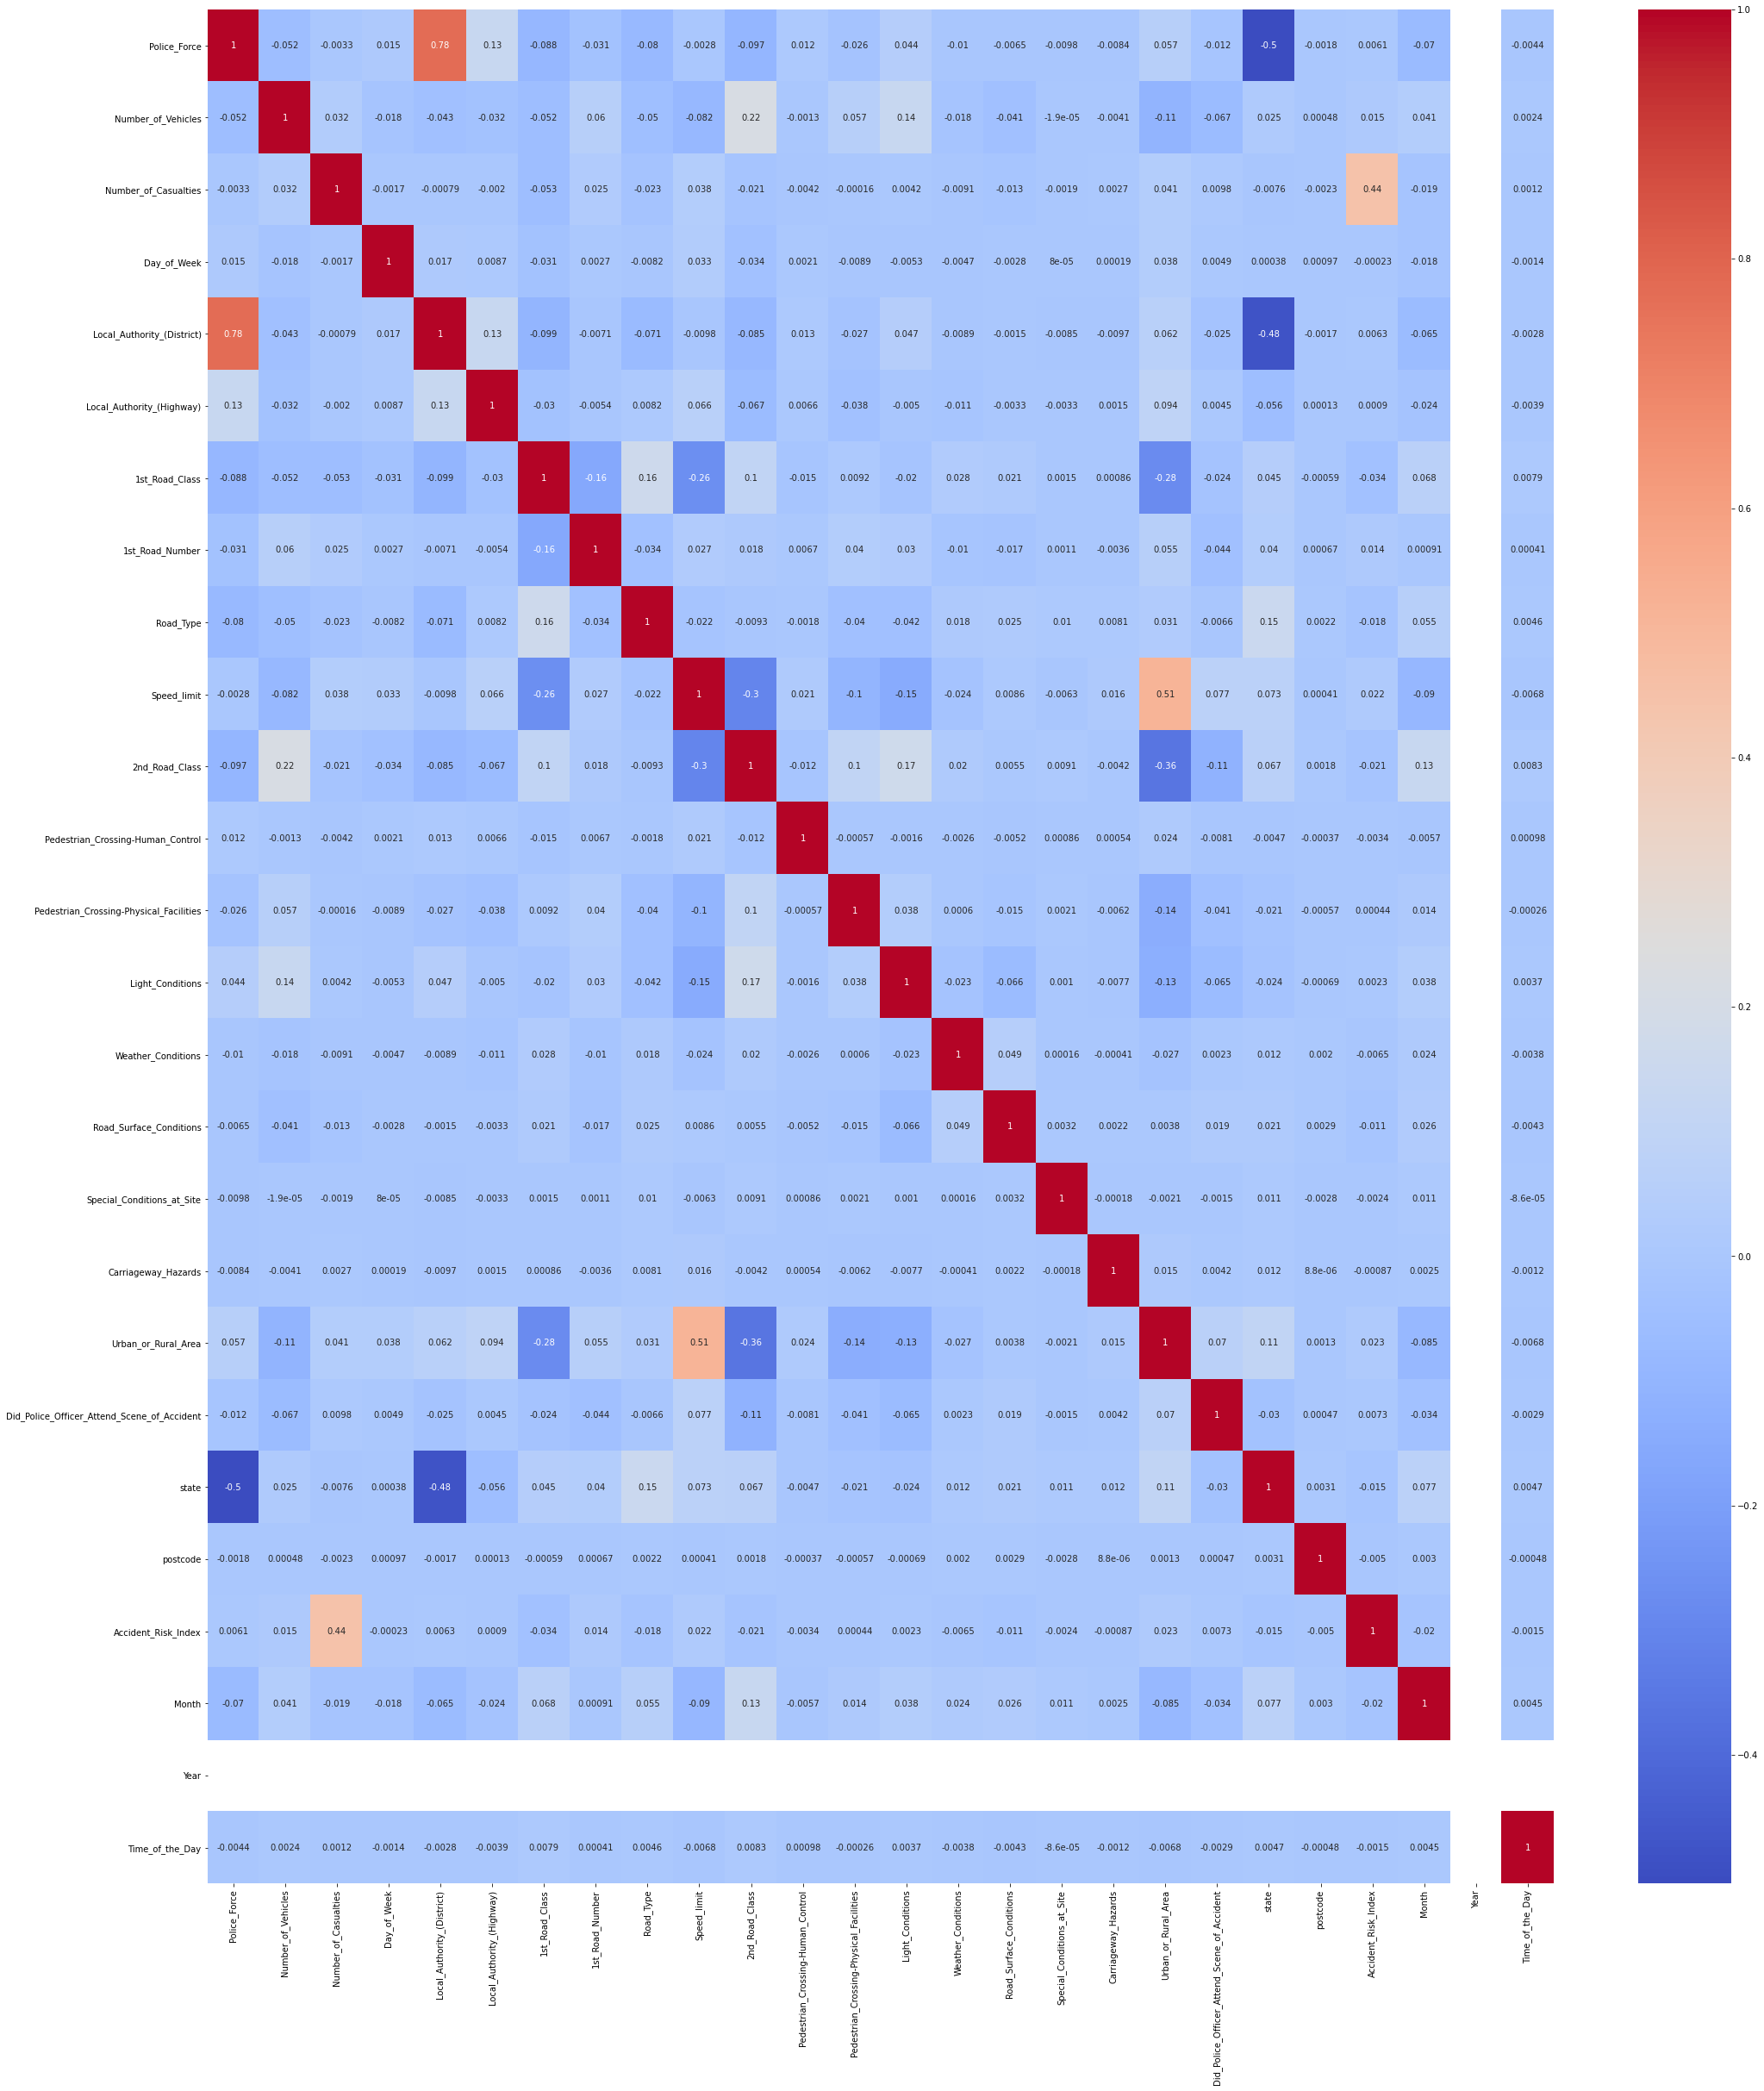

In [107]:
fig = plt.figure(figsize= (35, 40))
sns.heatmap(newtrain.corr(), annot = True, cmap = 'coolwarm')

In [108]:
x = newtrain.drop('Accident_Risk_Index', axis = 1)
y = newtrain['Accident_Risk_Index']

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred = lr.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.32382438284915155


In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.3233083315474457


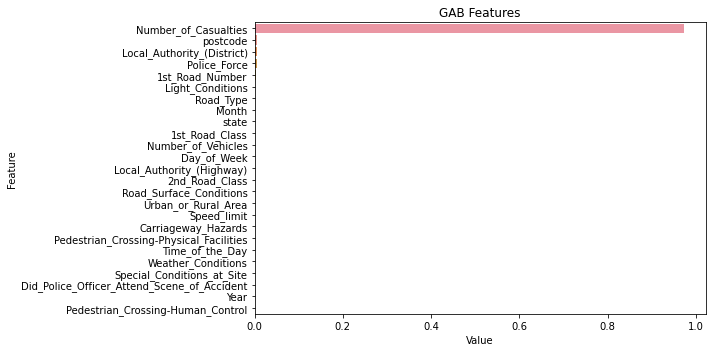

In [113]:
feature_imp = pd.DataFrame(sorted(zip(gab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GAB Features')
plt.tight_layout()
plt.show()

In [114]:
params = {'n_estimators' : [1, 2, 5, 10, 15, 20, 50], 'learning_rate' : [0.1, 0.01, 1],
         'max_depth' : [1, 2, 3, 5, 10]}

In [116]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gab, params, cv = 3, n_jobs = -1)

In [117]:
grid.fit(x_train, y_train).predict(x_test)

array([1.39500777, 1.79631054, 1.36106692, ..., 2.12111552, 1.77781386,
       1.36312158])

In [118]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=5, n_estimators=50)

In [119]:
grid.best_score_

0.19944679443747262

In [120]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [121]:
best_grid = grid.best_estimator_

In [122]:
x_train = newtrain.drop(['Accident_Risk_Index', 'Year'], axis = 1)
y_train = newtrain['Accident_Risk_Index']
x_test = newtest.drop('Year', axis = 1)

In [123]:
y_pred = best_grid.fit(x_train, y_train).predict(x_test)

In [124]:
newtest['Accident_risk_index'] = y_pred
newtest['postcode'] = le.inverse_transform(newtest['postcode'])
newtest.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,Month,Year,Time_of_the_Day,Accident_risk_index
0,13,2,0,6,218,149,4,6358,3,60,...,3,3,2,1,2,HX2 8WH,10,13,1,1.366635
1,13,2,0,7,157,150,6,29,3,30,...,3,3,1,0,2,RM8 1DD,4,13,1,1.366800
2,13,2,0,3,155,102,3,5376,2,40,...,3,3,1,1,2,SE23 1NH,9,13,2,1.365698
3,13,2,0,4,26,135,4,1252,3,30,...,3,3,1,1,2,HU10 7QS,3,13,1,1.353078
4,14,2,0,1,6,66,4,1202,3,30,...,3,3,1,1,2,BD23 5JL,6,13,1,1.346908


In [125]:
solution = newtest.groupby('postcode').mean()['Accident_risk_index']

In [126]:
subm = pd.DataFrame(solution)
subm = subm.reset_index()
subm.head()

,postcode,Accident_risk_index
0,AB10 1AU,1.350018
1,AB10 1PG,1.332385
2,AB10 1TT,1.351979
3,AB10 1YP,1.355889
4,AB10 6LQ,1.333383


In [127]:
subm.shape

(49772, 2)

In [128]:
subm.to_csv('Solution.csv', index = False)